# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a training set and a test set of images of plant seedlings at various stages of grown. 
- Each image has a filename that is its unique id. 
- The dataset comprises 12 plant species.
- The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

### Dataset:
- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data
- The dataset was downloaded from the above Kagglewebsite.

### Context:

- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

### Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

## Steps
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. 
2. Data Pre-processing:<br>
 a. Normalization.<br>
 b. Gaussian Blurring.<br>
 c. Visualize data after pre-processing.
3. Make data compatible:<br>
 a. Split the dataset into training, testing, and validation set.<br>
(Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)<br>
[Read the note at the end of the problem statement for the reason behind using the train images for using for training and testing set.]<br>
 b. Reshape data into shapes compatible with Keras models.<br>
 c. Convert labels from digits to one hot vectors.<br>
 d. Print the label for y_train[0].
4. Building CNN:<br>
 a. Define layers.<br>
 b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)<br>
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
train_path = "/content/drive/My Drive/Colab Notebooks/UT Austin AIML Course/07-03_Project/02_Practice/train.zip"

In [5]:
# Make different folders for train and test data in the current directory of Google Colab notebook. (using mkdir)
!mkdir temp_train

# Unziping train file:

In [6]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [7]:
path = "./temp_train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [8]:
###
### Data Shape and Type
###

In [9]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


In [10]:
print(type(trainImg))
print(type(trainLabel))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
trainImg[0]

array([[[ 53,  77,  99],
        [ 50,  74,  96],
        [ 42,  74,  96],
        ...,
        [ 81,  93, 110],
        [ 92, 106, 117],
        [ 79,  90, 103]],

       [[ 56,  85, 103],
        [ 57,  86, 108],
        [ 46,  83, 107],
        ...,
        [ 53,  65,  84],
        [ 54,  67,  84],
        [ 54,  63,  84]],

       [[ 68,  99, 115],
        [ 71, 100, 116],
        [ 63,  96, 116],
        ...,
        [ 55,  64,  82],
        [ 54,  59,  77],
        [ 53,  61,  82]],

       ...,

       [[120, 118, 117],
        [ 87,  84,  89],
        [ 89,  86,  89],
        ...,
        [138, 127, 122],
        [187, 177, 174],
        [190, 178, 175]],

       [[123, 120, 118],
        [ 87,  84,  90],
        [ 90,  86,  89],
        ...,
        [153, 143, 144],
        [184, 174, 173],
        [185, 176, 172]],

       [[121, 115, 111],
        [ 85,  83,  84],
        [ 86,  84,  85],
        ...,
        [116, 113, 108],
        [147, 143, 140],
        [146, 144, 140]]

In [12]:
trainImg[0:2]

array([[[[ 53,  77,  99],
         [ 50,  74,  96],
         [ 42,  74,  96],
         ...,
         [ 81,  93, 110],
         [ 92, 106, 117],
         [ 79,  90, 103]],

        [[ 56,  85, 103],
         [ 57,  86, 108],
         [ 46,  83, 107],
         ...,
         [ 53,  65,  84],
         [ 54,  67,  84],
         [ 54,  63,  84]],

        [[ 68,  99, 115],
         [ 71, 100, 116],
         [ 63,  96, 116],
         ...,
         [ 55,  64,  82],
         [ 54,  59,  77],
         [ 53,  61,  82]],

        ...,

        [[120, 118, 117],
         [ 87,  84,  89],
         [ 89,  86,  89],
         ...,
         [138, 127, 122],
         [187, 177, 174],
         [190, 178, 175]],

        [[123, 120, 118],
         [ 87,  84,  90],
         [ 90,  86,  89],
         ...,
         [153, 143, 144],
         [184, 174, 173],
         [185, 176, 172]],

        [[121, 115, 111],
         [ 85,  83,  84],
         [ 86,  84,  85],
         ...,
         [116, 113, 108],
        

In [13]:
trainLabel[0]

0       Common Chickweed
1       Common Chickweed
2       Common Chickweed
3       Common Chickweed
4       Common Chickweed
              ...       
4745         Black-grass
4746         Black-grass
4747         Black-grass
4748         Black-grass
4749         Black-grass
Name: 0, Length: 4750, dtype: object

In [14]:
trainLabel[0][0]

'Common Chickweed'

In [15]:
trainLabel[0][1]

'Common Chickweed'

In [16]:
trainLabel[0][4749]

'Black-grass'

In [17]:
trainLabel[0:2]

,0
0,Common Chickweed
1,Common Chickweed


In [18]:
###
### Split the data (Split the dataset into training, testing, and validation set.)
###

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainImg, trainLabel, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [20]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [21]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3325, 1)
(712, 1)
(713, 1)


In [22]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
# Note
# The Data are already compatible with Keras models

In [24]:
###
### Visualize some sample images from the dataset
###

In [25]:
X_train[0]

array([[[163, 159, 148],
        [165, 157, 151],
        [162, 154, 151],
        ...,
        [ 97, 112, 122],
        [ 84, 104, 118],
        [ 54,  77,  99]],

       [[154, 150, 146],
        [156, 152, 146],
        [158, 154, 151],
        ...,
        [102, 112, 123],
        [ 88, 105, 121],
        [ 84, 106, 121]],

       [[ 67,  63,  64],
        [ 69,  66,  68],
        [ 69,  65,  65],
        ...,
        [ 92, 106, 125],
        [ 87, 103, 120],
        [ 84, 104, 119]],

       ...,

       [[ 39,  39,  43],
        [ 33,  33,  34],
        [ 39,  36,  40],
        ...,
        [ 45,  43,  46],
        [ 41,  37,  43],
        [ 39,  34,  40]],

       [[ 36,  35,  40],
        [ 34,  34,  40],
        [ 35,  33,  41],
        ...,
        [ 37,  32,  37],
        [ 38,  34,  40],
        [ 35,  32,  38]],

       [[ 36,  34,  38],
        [ 36,  34,  39],
        [ 40,  39,  45],
        ...,
        [ 50,  48,  52],
        [ 39,  40,  44],
        [ 29,  28,  33]]

In [26]:
y_train[0]

3925                   Sugar beet
2071                     Charlock
4389                 Common wheat
953     Small-flowered Cranesbill
4007                   Sugar beet
                  ...            
1033    Small-flowered Cranesbill
3264             Loose Silky-bent
1653                      Fat Hen
2607            Scentless Mayweed
2732            Scentless Mayweed
Name: 0, Length: 3325, dtype: object

In [27]:
y_train.iloc[0,0]

'Sugar beet'

In [28]:
y_train.iloc[1,0]

'Charlock'

In [29]:
y_train.iloc[-1,0]

'Scentless Mayweed'

In [30]:
y_train.iloc[3324,0]

'Scentless Mayweed'

In [31]:
###
### Visualize the images in dataset with the label
###

Label: Sugar beet


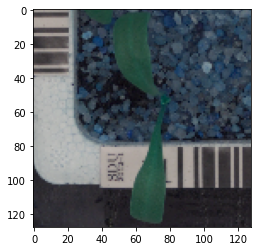

In [32]:
i = 0
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
plt.imshow(image);

Label: Charlock


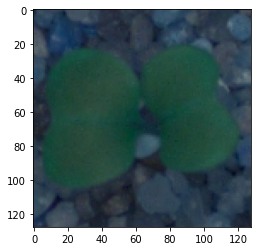

In [33]:
i = 1
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
plt.imshow(image);

Label: Charlock


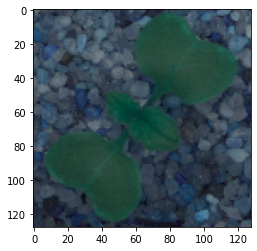

In [34]:
i = 3000
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
plt.imshow(image);

In [35]:
###
### Normalization
###

In [36]:
X_train_norm = X_train.astype('float32') / 255
X_val_norm = X_val.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

In [37]:
X_train[0]

array([[[163, 159, 148],
        [165, 157, 151],
        [162, 154, 151],
        ...,
        [ 97, 112, 122],
        [ 84, 104, 118],
        [ 54,  77,  99]],

       [[154, 150, 146],
        [156, 152, 146],
        [158, 154, 151],
        ...,
        [102, 112, 123],
        [ 88, 105, 121],
        [ 84, 106, 121]],

       [[ 67,  63,  64],
        [ 69,  66,  68],
        [ 69,  65,  65],
        ...,
        [ 92, 106, 125],
        [ 87, 103, 120],
        [ 84, 104, 119]],

       ...,

       [[ 39,  39,  43],
        [ 33,  33,  34],
        [ 39,  36,  40],
        ...,
        [ 45,  43,  46],
        [ 41,  37,  43],
        [ 39,  34,  40]],

       [[ 36,  35,  40],
        [ 34,  34,  40],
        [ 35,  33,  41],
        ...,
        [ 37,  32,  37],
        [ 38,  34,  40],
        [ 35,  32,  38]],

       [[ 36,  34,  38],
        [ 36,  34,  39],
        [ 40,  39,  45],
        ...,
        [ 50,  48,  52],
        [ 39,  40,  44],
        [ 29,  28,  33]]

In [39]:
###
### Compare the image before and after the normalization
###

Label: Sugar beet (Normalization)


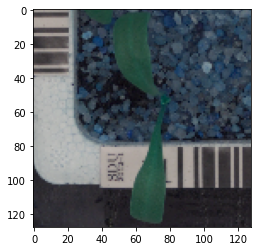

In [40]:
i = 0
image = X_train_norm[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization)')
plt.imshow(image);

Label: Sugar beet (Original)


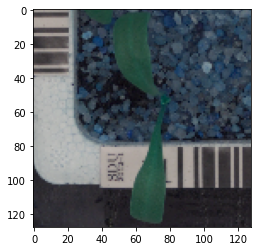

In [41]:
i = 0
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Original)')
plt.imshow(image);

Label: Charlock (Normalization)


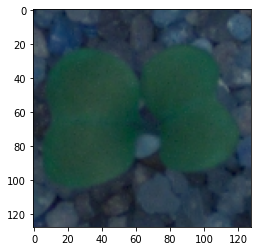

In [42]:
i = 1
image = X_train_norm[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization)')
plt.imshow(image);

Label: Charlock (Original)


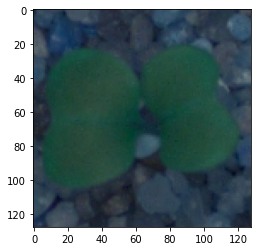

In [43]:
i = 1
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Original)')
plt.imshow(image);

Label: Charlock (Normalization)


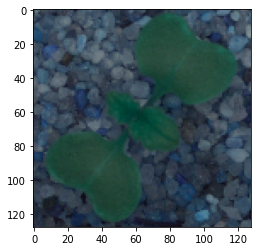

In [44]:
i = 3000
image = X_train_norm[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization)')
plt.imshow(image);

Label: Charlock (Original)


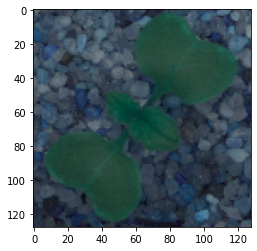

In [45]:
i = 3000
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Original)')
plt.imshow(image);

In [46]:
###
### Gaussian Blur
###

In [47]:
print(len(X_train_norm))
print(X_train_norm.shape)
print(len(X_val_norm))
print(X_val_norm.shape)
print(len(X_test_norm))
print(X_test_norm.shape)

3325
(3325, 128, 128, 3)
712
(712, 128, 128, 3)
713
(713, 128, 128, 3)


In [48]:
X_train_blur = np.empty((3325, 128, 128, 3))
X_val_blur = np.empty((712, 128, 128, 3))
X_test_blur = np.empty((713, 128, 128, 3))

In [49]:
X_train_blur.shape

(3325, 128, 128, 3)

In [50]:
for idx, line in enumerate(X_train_norm):
  X_train_blur[idx] = line

for idx, line in enumerate(X_val_norm):
  X_val_blur[idx] = line

for idx, line in enumerate(X_test_norm):
  X_test_blur[idx] = line

In [51]:
for idx, img in enumerate(X_train_blur):
  X_train_blur[idx] = cv2.GaussianBlur(img, (5,5), 0)

for idx, img in enumerate(X_val_blur):
  X_val_blur[idx] = cv2.GaussianBlur(img, (5,5), 0)

for idx, img in enumerate(X_test_blur):
  X_test_blur[idx] = cv2.GaussianBlur(img, (5,5), 0)

In [52]:
###
### Visualize some sample images from the dataset after the Normalization & the GaussianBlur and compare with the original images
###

Label: Sugar beet (Normalization & GaussianBlur)


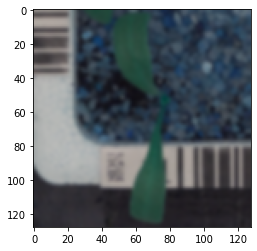

In [53]:
i = 0
image = X_train_blur[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization & GaussianBlur)')
plt.imshow(image);

Label: Sugar beet (Original)


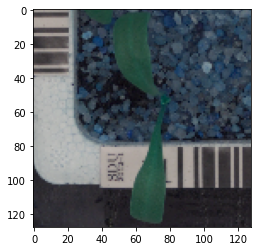

In [54]:
i = 0
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Original)')
plt.imshow(image);

Label: Charlock (Normalization & GaussianBlur)


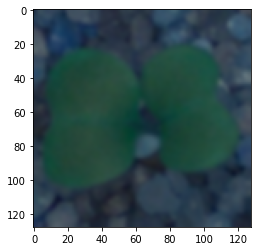

In [55]:
i = 1
image = X_train_blur[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization & GaussianBlur)')
plt.imshow(image);

Label: Charlock (Original)


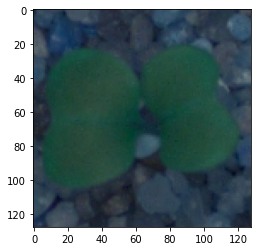

In [56]:
i = 1
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Original)')
plt.imshow(image);

Label: Charlock (Normalization & GaussianBlur)


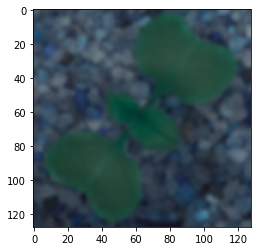

In [57]:
i = 3000
image = X_train_blur[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization & GaussianBlur)')
plt.imshow(image);

Label: Charlock (Original)


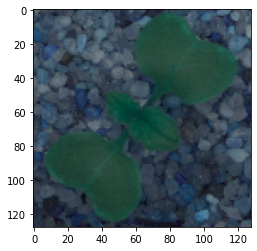

In [58]:
i = 3000
image = X_train[i]
label = y_train.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Original)')
plt.imshow(image);

In [59]:
###
### Convert labels to one hot vectors
###

In [60]:
# Print the label for y_train[0].

In [61]:
y_train[0]

3925                   Sugar beet
2071                     Charlock
4389                 Common wheat
953     Small-flowered Cranesbill
4007                   Sugar beet
                  ...            
1033    Small-flowered Cranesbill
3264             Loose Silky-bent
1653                      Fat Hen
2607            Scentless Mayweed
2732            Scentless Mayweed
Name: 0, Length: 3325, dtype: object

In [62]:
y_train.iloc[0,0]

'Sugar beet'

In [63]:
y_train

,0
3925,Sugar beet
2071,Charlock
4389,Common wheat
953,Small-flowered Cranesbill
4007,Sugar beet
...,...
1033,Small-flowered Cranesbill
3264,Loose Silky-bent
1653,Fat Hen
2607,Scentless Mayweed


In [64]:
y_val

,0
3141,Loose Silky-bent
806,Cleavers
3756,Sugar beet
352,Common Chickweed
3036,Loose Silky-bent
...,...
3489,Shepherds Purse
3961,Sugar beet
1765,Fat Hen
1084,Small-flowered Cranesbill


In [65]:
y_test

,0
4161,Maize
559,Common Chickweed
1141,Small-flowered Cranesbill
4159,Maize
3628,Shepherds Purse
...,...
927,Small-flowered Cranesbill
113,Common Chickweed
4715,Black-grass
2623,Scentless Mayweed


In [66]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [67]:
y_train_ohe = ohe.fit_transform(y_train).toarray()

In [68]:
y_val_ohe = ohe.fit_transform(y_val).toarray()

In [69]:
y_test_ohe = ohe.fit_transform(y_test).toarray()

In [70]:
print(y_train_ohe)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [71]:
print(y_val_ohe)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [72]:
print(y_test_ohe)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
print(y_train_ohe.shape)
print(y_val_ohe.shape)
print(y_test_ohe.shape)

(3325, 12)
(712, 12)
(713, 12)


In [74]:
# Print the label for y_train[0]

In [75]:
print(y_train_ohe[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [76]:
print(type(y_train_ohe))

<class 'numpy.ndarray'>


In [77]:
print(y_train.iloc[0,0])

Sugar beet


In [78]:
ohe.categories_

[array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
        'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
        'Scentless Mayweed', 'Shepherds Purse',
        'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)]

In [79]:
ohe.categories_[0][0]

'Black-grass'

In [80]:
ohe.categories_[0][11]

'Sugar beet'

In [81]:
label_dict = {}

In [82]:
for idx, category in enumerate(ohe.categories_[0]):
  print(idx)
  print(category)

0
Black-grass
1
Charlock
2
Cleavers
3
Common Chickweed
4
Common wheat
5
Fat Hen
6
Loose Silky-bent
7
Maize
8
Scentless Mayweed
9
Shepherds Purse
10
Small-flowered Cranesbill
11
Sugar beet


In [83]:
for idx, category in enumerate(ohe.categories_[0]):
  label_dict[idx] = category

In [84]:
label_dict

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [85]:
label_dict[0]

'Black-grass'

In [86]:
###
### Build a CNN model
###

In [87]:
###
### Define layers
###

In [88]:
from tensorflow.keras import datasets, models, layers, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train_blur.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(y_train_ohe.shape[1], activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [89]:
###
### Set optimizer and loss function (use Adam optimizer and categorical crossentropy)
###

In [90]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [91]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [92]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.0001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [93]:
###
### Fit the model
###

Epoch 1/40
104/104 [==============================] - 35s 30ms/step - loss: 4.5672 - accuracy: 0.1702 - val_loss: 2.5192 - val_accuracy: 0.1404

Epoch 00001: val_loss improved from inf to 2.51923, saving model to cifar_cnn_checkpoint_01_loss2.5192.h5
Epoch 2/40
104/104 [==============================] - 2s 21ms/step - loss: 1.8020 - accuracy: 0.3717 - val_loss: 2.8538 - val_accuracy: 0.1404

Epoch 00002: val_loss did not improve from 2.51923
Epoch 3/40
104/104 [==============================] - 2s 21ms/step - loss: 1.5789 - accuracy: 0.4563 - val_loss: 3.0270 - val_accuracy: 0.1559

Epoch 00003: val_loss did not improve from 2.51923
Epoch 4/40
104/104 [==============================] - 2s 21ms/step - loss: 1.4724 - accuracy: 0.4866 - val_loss: 2.6859 - val_accuracy: 0.1742

Epoch 00004: val_loss did not improve from 2.51923
Epoch 5/40
104/104 [==============================] - 2s 20ms/step - loss: 1.3789 - accuracy: 0.5338 - val_loss: 2.1209 - val_accuracy: 0.2008

Epoch 00005: val_los

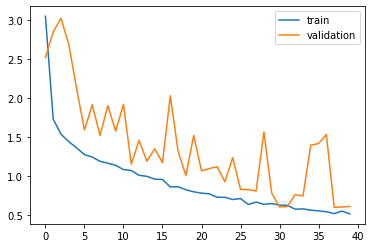

In [94]:
batch_size = 32
epochs = 40

history = model.fit(X_train_blur,
                    y_train_ohe,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val_blur, y_val_ohe),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

## plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [95]:
# Score trained model.
scores = model.evaluate(X_test_blur, y_test_ohe, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 10ms/step - loss: 0.6019 - accuracy: 0.8036
Test loss: 0.601947009563446
Test accuracy: 0.8036465644836426


In [96]:
###
### Predict
###

In [97]:
y_pred = model.predict(X_test_blur)

In [98]:
###
### Confusion Matrix
###

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
y_test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
y_test_ohe.shape

(713, 12)

In [102]:
y_test_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [103]:
y_test

,0
4161,Maize
559,Common Chickweed
1141,Small-flowered Cranesbill
4159,Maize
3628,Shepherds Purse
...,...
927,Small-flowered Cranesbill
113,Common Chickweed
4715,Black-grass
2623,Scentless Mayweed


In [104]:
y_pred

array([[3.1694962e-04, 1.6054789e-04, 9.0226587e-03, ..., 3.2027005e-03,
        1.1674323e-02, 6.6547029e-02],
       [1.2188925e-03, 2.1721803e-06, 4.5131554e-04, ..., 7.7900686e-03,
        1.9212287e-03, 5.3311157e-04],
       [1.1286392e-04, 5.9494879e-03, 5.8533534e-02, ..., 5.0364868e-03,
        9.2304349e-01, 6.1243732e-04],
       ...,
       [5.9200025e-01, 3.5141527e-06, 4.4954137e-05, ..., 3.5900837e-07,
        3.7836720e-04, 2.2948549e-05],
       [2.1479083e-03, 7.8644734e-03, 1.2513728e-02, ..., 1.0676553e-01,
        7.3989443e-02, 2.1722806e-01],
       [2.7432549e-03, 3.8871480e-07, 1.1040719e-03, ..., 2.9306471e-05,
        1.7193212e-03, 6.1381800e-04]], dtype=float32)

In [105]:
y_pred.shape

(713, 12)

In [106]:
np.argmax(y_pred)

71

In [107]:
ohe_list = np.array([])

In [108]:
ohe_list = np.append(ohe_list, 1)

In [109]:
ohe_list= np.append(ohe_list, 3)

In [110]:
ohe_list.shape

(2,)

In [111]:
ohe_list

array([1., 3.])

In [112]:
y_test_ohe_list = np.array([])

for ohe_code in y_test_ohe:
  y_test_ohe_list = np.append(y_test_ohe_list, np.argmax(ohe_code))

In [113]:
y_test_ohe_list

array([ 7.,  3., 10.,  7.,  9., 11., 10.,  6.,  5.,  1.,  0.,  0.,  3.,
        2., 11.,  6.,  3.,  6.,  6.,  0.,  6.,  7.,  6.,  6.,  6.,  2.,
        3.,  4.,  6.,  9.,  4.,  6., 11.,  6.,  3.,  3., 11., 11.,  3.,
       10.,  2.,  3.,  3.,  6., 11.,  4.,  2.,  1.,  5.,  3.,  8., 10.,
        1.,  8.,  9.,  3.,  8., 11.,  1.,  6.,  4.,  6.,  5.,  6.,  9.,
        1.,  2.,  3.,  5., 11.,  6.,  7., 11.,  8.,  3.,  5.,  3.,  8.,
        9.,  5., 11., 10.,  2.,  5.,  2.,  6.,  9.,  4.,  2.,  6.,  6.,
        6.,  8.,  1., 10.,  5., 11.,  8., 10.,  8.,  6., 11.,  5.,  5.,
       11.,  6., 11.,  3., 11.,  5.,  5.,  7.,  5., 10.,  9.,  0.,  5.,
        8.,  3., 10.,  9., 11.,  2.,  7.,  3.,  2.,  8.,  3.,  6.,  8.,
        3., 10.,  3.,  4.,  3.,  7.,  5.,  0.,  6.,  3., 11., 11.,  5.,
       11.,  3., 10.,  6.,  3.,  0.,  3., 11.,  3.,  6.,  6.,  9., 11.,
        6.,  1.,  6.,  7.,  7.,  8., 11.,  3., 10.,  9., 11.,  9.,  3.,
        3.,  3.,  5.,  1.,  6.,  3.,  6., 11.,  1.,  1., 10.,  1

In [114]:
y_pred_ohe_list = np.array([])

for pred_code in y_pred:
  y_pred_ohe_list = np.append(y_pred_ohe_list, np.argmax(pred_code))

In [115]:
y_pred_ohe_list

array([ 7.,  3., 10.,  4.,  9., 11., 10.,  6.,  5.,  1.,  0.,  4.,  3.,
        2., 11.,  0.,  3.,  6.,  6.,  0.,  0., 11.,  6.,  6.,  6.,  2.,
        3.,  4.,  6.,  9.,  4.,  6., 11.,  0.,  3.,  3., 11., 11.,  3.,
       10.,  2.,  3.,  3.,  6., 11.,  4.,  2.,  1.,  5.,  3.,  8., 10.,
        1.,  8.,  9.,  3.,  8., 11.,  1.,  0.,  4.,  0.,  5.,  0.,  3.,
        2.,  2., 11.,  5., 11.,  6., 11., 11.,  8.,  3.,  5.,  3.,  6.,
        9.,  5., 11., 10.,  2.,  5.,  2.,  6.,  9.,  4.,  2.,  4.,  6.,
        0., 11.,  1., 10.,  5., 11.,  8., 10.,  8.,  6., 11., 11.,  5.,
       11.,  0., 11.,  3., 11.,  5.,  5.,  6.,  5., 10., 11.,  0.,  5.,
        1.,  3., 10., 10., 11.,  2.,  7., 10.,  2.,  1.,  3.,  6.,  8.,
        3., 10.,  3.,  4.,  5.,  1.,  1.,  0.,  6.,  3.,  1., 11.,  5.,
        5.,  3., 10.,  6.,  3.,  3.,  3., 11.,  3.,  6.,  6.,  9., 11.,
        0.,  1.,  5.,  7., 11., 11., 11.,  3., 10., 11., 11.,  9.,  3.,
        8.,  3.,  5.,  1.,  6.,  3.,  6., 11.,  1.,  1., 10.,  1

In [116]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test_ohe_list, y_pred_ohe_list)
print(cm)

=== Confusion Matrix ===
[[21  0  0  1  6  0  1  0  0  0  0  0]
 [ 0 47 10  0  0  0  0  0  0  0  0  3]
 [ 0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 87  0  5  0  0  3  2  8  1]
 [ 0  0  1  0 30  0  0  0  0  0  0  0]
 [ 0  1  2  0  3 64  0  0  0  0  1  2]
 [31  0  0  0  3  1 77  0  0  0  0  0]
 [ 0  2  0  0  2  1  3 23  1  0  0  9]
 [ 0  2  2  1  0  0  2  0 52  1  0 10]
 [ 0  0  0  3  0  0  0  0  0 26  2  3]
 [ 0  0  4  0  0  0  0  1  0  0 60  0]
 [ 0  1  1  1  0  3  0  0  0  0  0 56]]


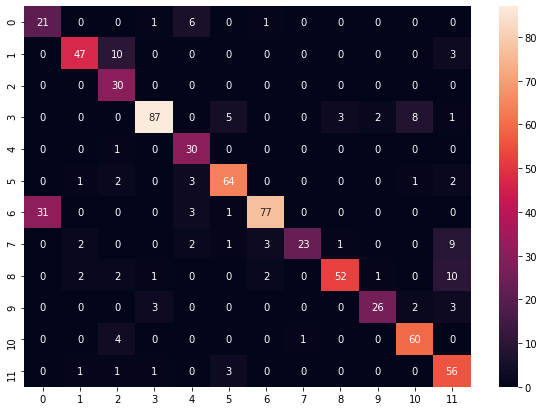

In [117]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in [0,1,2,3,4,5,6,7,8,9,10,11]],
                     columns = [i for i in [0,1,2,3,4,5,6,7,8,9,10,11]])
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [118]:
print("=== Classification Report ===")
print(classification_report(y_test_ohe_list, y_pred_ohe_list))

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.40      0.72      0.52        29
         1.0       0.89      0.78      0.83        60
         2.0       0.60      1.00      0.75        30
         3.0       0.94      0.82      0.87       106
         4.0       0.68      0.97      0.80        31
         5.0       0.86      0.88      0.87        73
         6.0       0.93      0.69      0.79       112
         7.0       0.96      0.56      0.71        41
         8.0       0.93      0.74      0.83        70
         9.0       0.90      0.76      0.83        34
        10.0       0.85      0.92      0.88        65
        11.0       0.67      0.90      0.77        62

    accuracy                           0.80       713
   macro avg       0.80      0.81      0.79       713
weighted avg       0.84      0.80      0.81       713



In [119]:
###
### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]
###

Label: Small-flowered Cranesbill (Normalization & GaussianBlur)


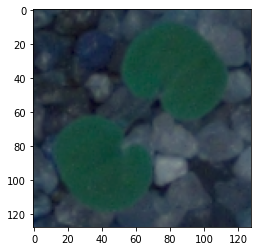

In [120]:
i = 2
image = X_test[i]
label = y_test.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label} (Normalization & GaussianBlur)')
plt.imshow(image);

In [121]:
y_pred[i]

array([1.1286392e-04, 5.9494879e-03, 5.8533534e-02, 8.6878688e-04,
       2.0672046e-04, 5.1154634e-03, 1.6470758e-04, 2.6546317e-04,
       9.0642541e-05, 5.0364868e-03, 9.2304349e-01, 6.1243732e-04],
      dtype=float32)

In [122]:
np.argmax(y_pred[i])

10

In [123]:
label_dict[10]

'Small-flowered Cranesbill'

In [124]:
label_dict[np.argmax(y_pred[i])]

'Small-flowered Cranesbill'

In [125]:
# x_test[2]

Label: Small-flowered Cranesbill
Predict:  Small-flowered Cranesbill


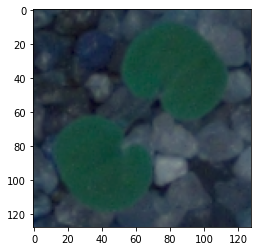

In [126]:
# Correctly Predicted
i = 2
image = X_test[i]
label = y_test.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
print('Predict: ', label_dict[np.argmax(y_pred[i])])
plt.imshow(image);

In [127]:
# x_test[3]

Label: Maize
Predict:  Common wheat


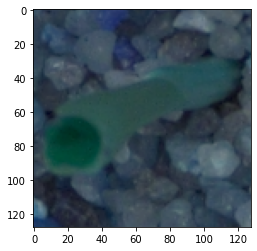

In [128]:
# Did not Correctly Predict
i = 3
image = X_test[i]
label = y_test.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
print('Predict: ', label_dict[np.argmax(y_pred[i])])
plt.imshow(image);

In [129]:
# x_test[33]

Label: Loose Silky-bent
Predict:  Black-grass


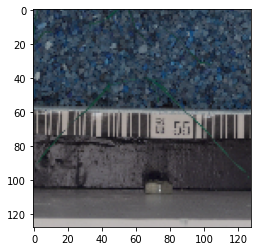

In [130]:
# Did not Correctly Predict
i = 33
image = X_test[i]
label = y_test.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
print('Predict: ', label_dict[np.argmax(y_pred[i])])
plt.imshow(image);

In [131]:
# x_test[36]

Label: Sugar beet
Predict:  Sugar beet


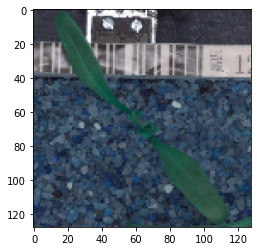

In [132]:
# Correctly Predicted
i = 36
image = X_test[i]
label = y_test.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
print('Predict: ', label_dict[np.argmax(y_pred[i])])
plt.imshow(image);

In [133]:
# x_test[59]

Label: Loose Silky-bent
Predict:  Black-grass


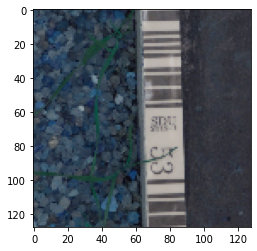

In [134]:
# Did not Correctly Predict
i = 59
image = X_test[i]
label = y_test.iloc[i,0]
#print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
print(f'Label: {label}')
print('Predict: ', label_dict[np.argmax(y_pred[i])])
plt.imshow(image);

### Github
*https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-KokiTabayashi.git*